## 프로젝트 : 다양한 OCR모델 비교하기

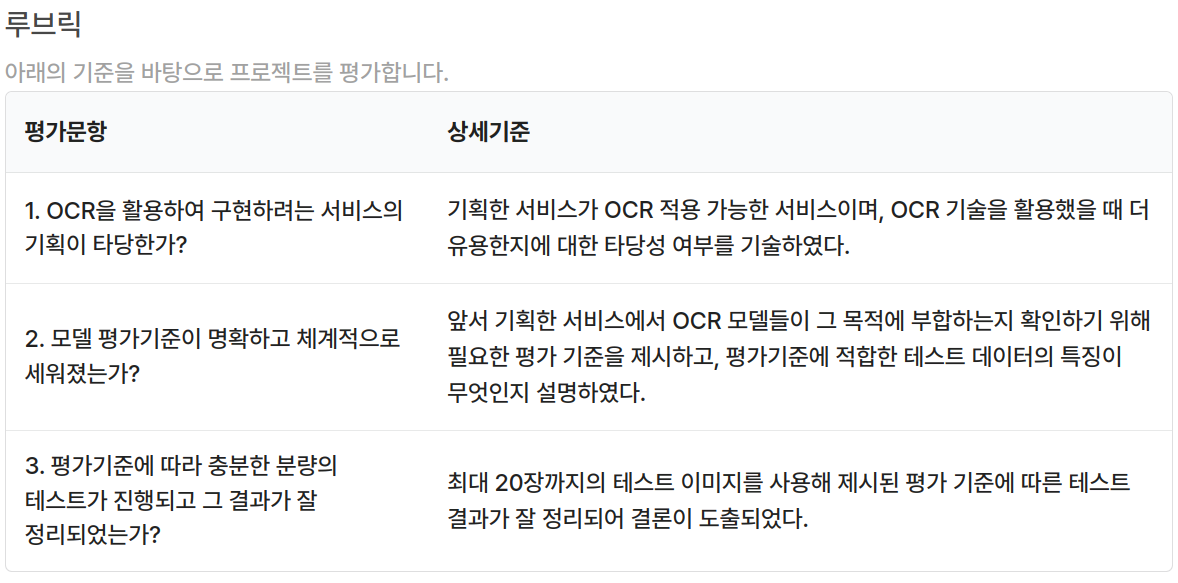

### 카메라로 책 표지를 찍으면 제목, 작가가 텍스트로 기록되는 프로그램
 요즘 같은 디지털 시대에는 영상 매체나 sns 등 재밌는게 너무 많아 도무지 책을 읽을 시간이 없다. 또 가끔 시간이 나서 책을 읽으려해도 어떤 책을 읽어야할지 찾는데 다시 시간이 든다. 나는 그럴 때를 대비해 평소 도서관이나 서점에서 흥미로워보이는 책 표지를 찍어놓고는 한다. 그러나 이런 이미지들도 그 즉시 바로 정리하지 않으면 다른 사진들 속에 묻혀 찾기 힘들어지고, 시간이 흘러 사진첩 정리할 때 발견하게 되어 흥미를 잃은 채 지워버리기 일수다.     
     
 그렇다면 사진을 찍은 즉시 제목과 작가가 텍스트로 기록된다면 어떨까? 메모장에 저장되도록 연동하거나, 사진의 제목 자체를 '제목-작가' 순으로 저장해도 좋을 것이다. 좋다, 일단 책 표지를 찍은 사진에서 제목과 작가의 이름을 인식해보자!

In [ ]:
pip install keras-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 81.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 5.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=5d6e3690a55ff62025ceab5f807aa89e48f1a679359ef799e3f725192b973c06
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 3s (1,900 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade google-api-python-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.70.0
    Uninstalling google-api-python-client-2.70.0:
      Successfully uninstalled google-api-python-client-2.70.0


In [ ]:
pip install --upgrade google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.2/444.2 KB 31.0 MB/s eta 0:00:00


In [ ]:
pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import io
import glob
import keras_ocr
import pytesseract
from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import platform
# from utils import plt_imshow
 
import cv2
from google.cloud import vision
# from google.cloud.vision import types
from google.cloud.vision_v1 import types

print(keras_ocr.__version__)
print(pytesseract.__version__)

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

0.9.2
0.3.10
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
# 구글 드라이브 연결 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Step1. 검증용 데이터셋 준비

In [ ]:
# 검증 이미지 준비 
work_dir = '/content/gdrive/My Drive/train'
fileEx = r'.jpg'
file_list = [os.path.join(work_dir, file) for file in os.listdir(work_dir) if file.endswith(fileEx)]

print ("file_list: {}".format(file_list))

file_list: ['/content/gdrive/My Drive/train/ahmed-almakhzanji-kshkB1i5_5o-unsplash.jpg', '/content/gdrive/My Drive/train/matt-ridley-H-LIL57PHCc-unsplash.jpg', '/content/gdrive/My Drive/train/shayna-douglas-LVtTIR8SyjU-unsplash.jpg', '/content/gdrive/My Drive/train/tim-alex-xG5VJW-7Bio-unsplash.jpg', '/content/gdrive/My Drive/train/tim-alex-1i-P178kxHQ-unsplash.jpg', '/content/gdrive/My Drive/train/sincerely-media-dBFF-g2MhoE-unsplash.jpg']


Ref.    
https://seong6496.tistory.com/136 특정 확장자인 파일만 불러오기

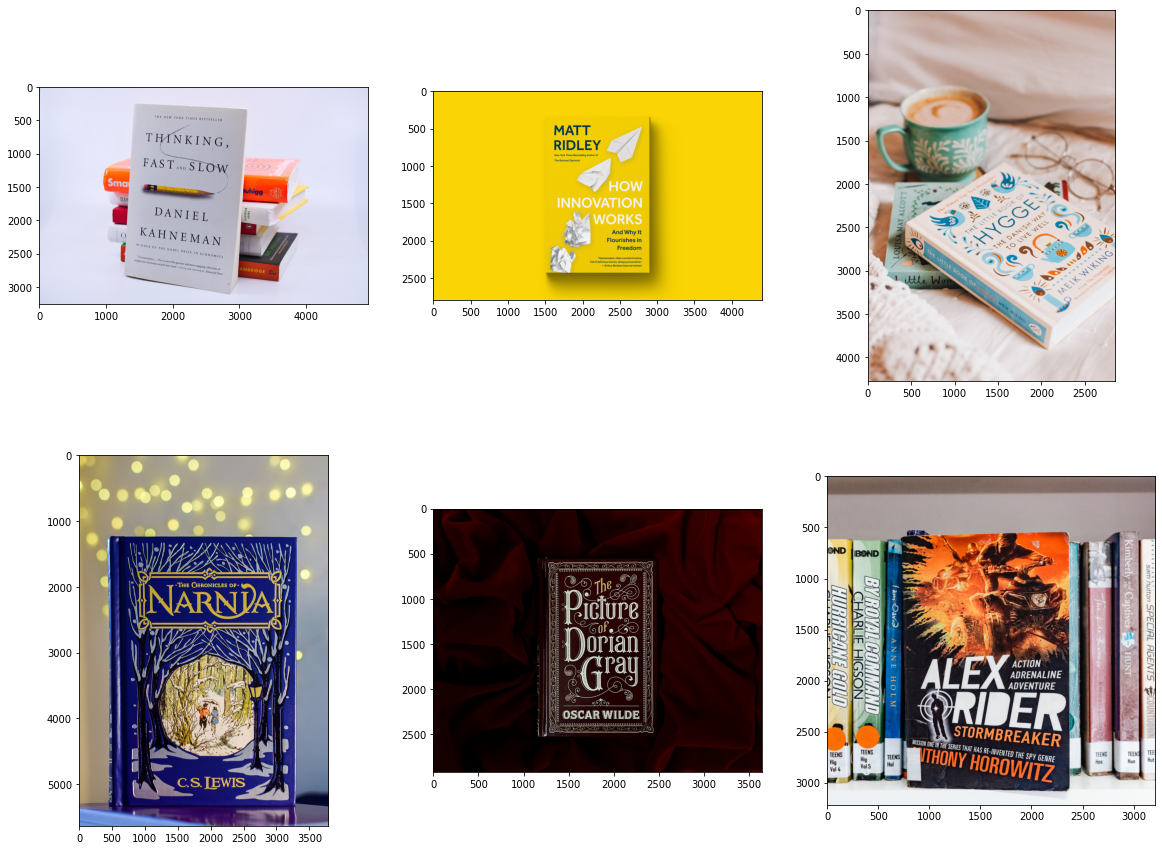

In [ ]:
# 검증 이미지 출력 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

for i, ax in enumerate(axes.flatten()):
#   image = img.imread(work_dir+'/'+file_list[i])
  image = img.imread(file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

### Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)
위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.

#### 1) Keras-OCR

In [ ]:
work_dir = '/content/gdrive/My Drive/train'
img = glob.glob(work_dir + '/*.jpg')
print(img)

['/content/gdrive/My Drive/train/ahmed-almakhzanji-kshkB1i5_5o-unsplash.jpg', '/content/gdrive/My Drive/train/matt-ridley-H-LIL57PHCc-unsplash.jpg', '/content/gdrive/My Drive/train/shayna-douglas-LVtTIR8SyjU-unsplash.jpg', '/content/gdrive/My Drive/train/tim-alex-xG5VJW-7Bio-unsplash.jpg', '/content/gdrive/My Drive/train/tim-alex-1i-P178kxHQ-unsplash.jpg', '/content/gdrive/My Drive/train/sincerely-media-dBFF-g2MhoE-unsplash.jpg']


In [ ]:
images = [keras_ocr.tools.read(path) for path in img]
prediction_groups = [pipeline.recognize([path]) for path in img]

2/2 [==============================] - 1s 1s/step


error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor' 에러가 났다. 불러올 이미지의 경로나 이름에 오자가 있을 때 발생한다고 한다. 
read에 인자를 url이 아닌 경로로 바꿔주었다. 

Ref.  
https://damio.tistory.com/57     
https://keras-ocr.readthedocs.io/en/latest/api.html keras-ocr.read document 

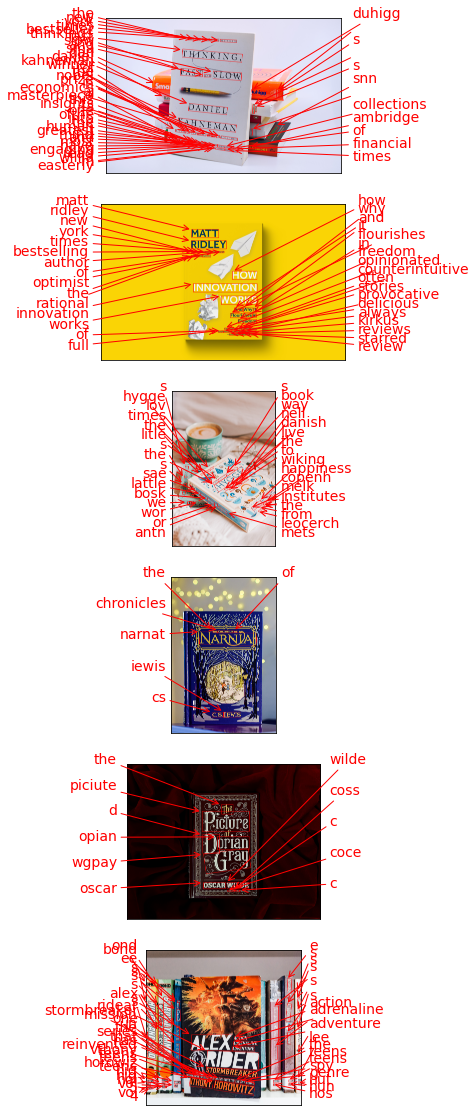

In [ ]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

선명하게 정자로 프린팅된 글씨는 대체로 잘 인식한다. 그러나 손글씨, 모양이 있는 글씨, 흐릿한 글씨는 잘 인식하지 못하는 것을 확인할 수 있다.    
또한 영어 알파벳 이외에 #, &와 같은 특수문자도 인식하지 못한다. 반면 세번째 그림에서는 문자 사이에 다른 오브젝트들을 비슷한 알파벳으로 인식함을 알 수 있다. 

#### 2) Tesseract

In [ ]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
#             print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [ ]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [ ]:
# 여러 이미지에서 한번에 문자를 추출하는 함수 
def get_img():
    work_dir = '/content/gdrive/My Drive/train/'
    for img in glob.glob(work_dir + '*.jpg'):
        crop_word_regions(img, work_dir)
        cropped_image_path_list = crop_word_regions(img, work_dir)
        recognize_images(cropped_image_path_list)
        raw_img = Image.open(img)
        plt.imshow(raw_img)
        plt.show()
        print('========================================')

THE

NEw

YORK

TIMES

BESTSELLER



5

TA]

Masterpiece



Sa

.

This

1

‘Sights

Into

the

huma


Done


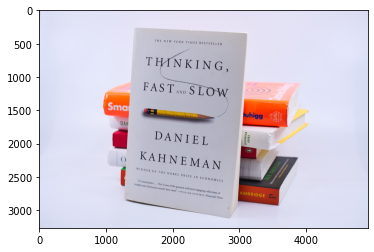



MAT T

New t Times Bestselling = ¥

New

rk

mes

estsellin

S|

te 5 Y \

| ay

A 4



ptm





WORKS

Ana

Why

it

Flourisnes

in

Freedom

Done


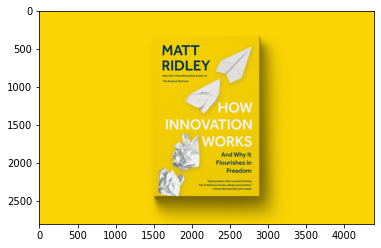


Done


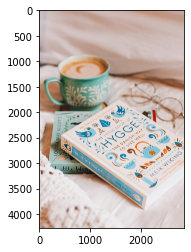




7



:


Done


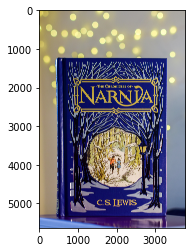


Done


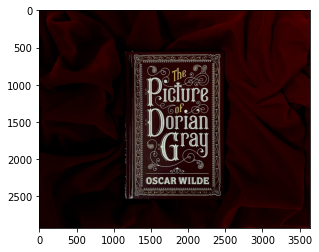

iia gues eps Cr. He - Lee i i is fs —

J

:

I

ete


-,

}

= |

&

eS eve a

3


Done


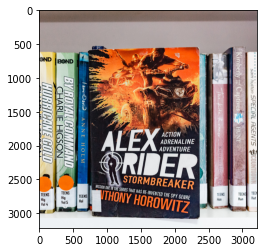

In [ ]:
get_img()

#### 3) Google OCR API

In [ ]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
# 인증키 경로 지정 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  "/content/my_google_api_key.json"

total 8
drwx------ 5 root root 4096 Mar 16 09:23 gdrive
drwxr-xr-x 1 root root 4096 Mar 14 13:35 sample_data


In [ ]:
# 이미지를 하나씩 detect_text()하는 함수 
def get_google():
    work_dir = '/content/gdrive/My Drive/train/'
    for img in glob.glob(work_dir + '*.jpg'):
        detect_text(img)

In [ ]:
get_google()

PermissionDenied: ignored

_InactiveRpcError Traceback (most recent call last) 에러가 나왔다. 찾아보니 잠깐 서비스가 안돼서 발생하는 문제라 몇 분, 몇 시간 뒤에 시도하면 되기도 한다는데, 여러번 실행해도 안되고 lms 주피터에 옮겨도 같은 에러가 나온다.    
퍼실님께 여쭤보니, Google API도 오늘 가입한거라 기간이 만료됐을리는 없고, 더이상 무료로 OCR을 쓸 수 없는 것 같다고 하셨다.. Google OCR API는 이 이상 진행이 불가능하다. 

Ref.    
https://stackoverflow.com/questions/67156081/inactiverpcerror-while-using-workflow

### Step3. 테스트 결과 정리

||Keras-OCR|Tesseract|
|---|---|---|
|책 1|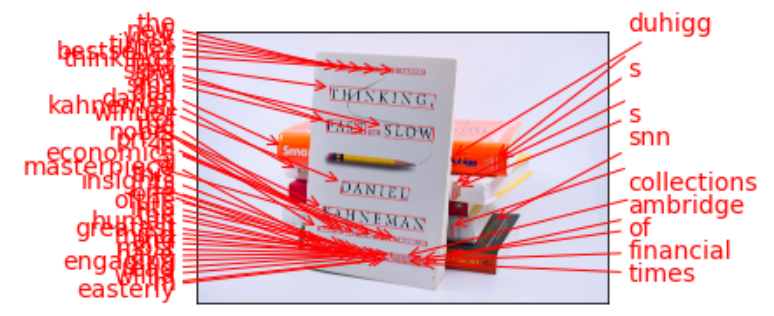|THE NEw YORK TIMES BESTSELLER 5 TA] Masterpiece Sa . This 1 ‘Sights Into the huma |
|책 2|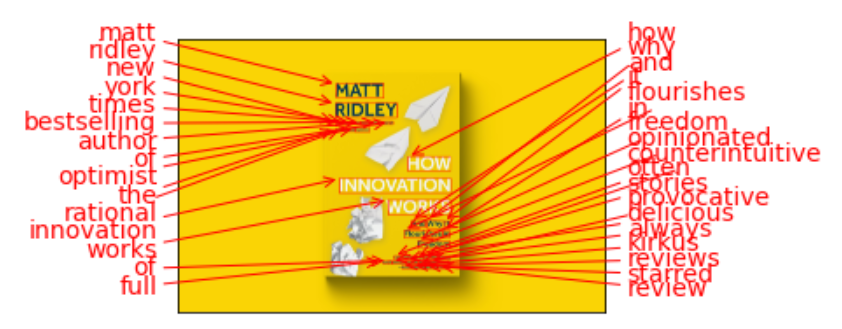|MAT T New t Times Bestselling = ¥ New rk mes estsellin S| te 5 Y \ | ay A 4 ptm WORKS Ana Why it Flourisnes in Freedom|
|책 3|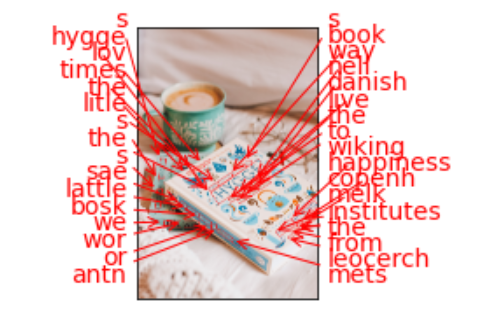|Null|
|책 4|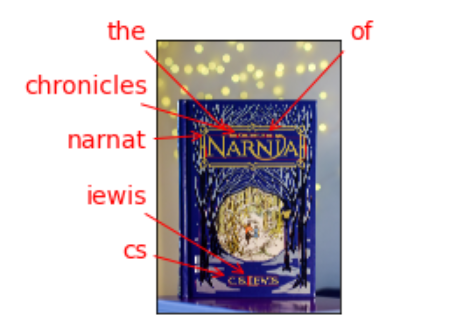|..|
|책 5|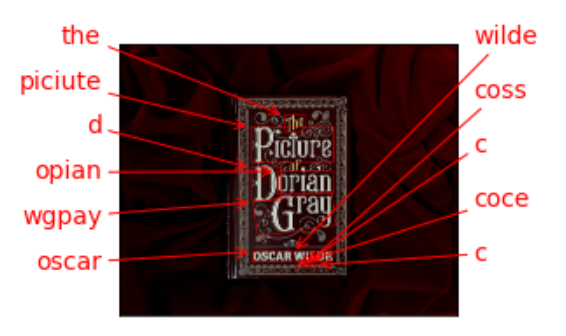|Null|
|책 6|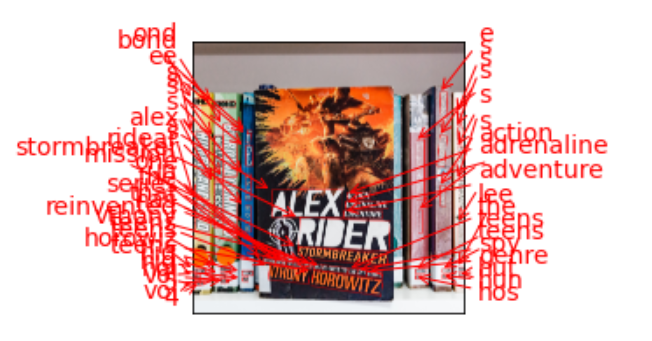|iia gues eps Cr. He - Lee i i is fs — J : I ete -, } = | & eS eve a 3|

Keras-OCR의 결과가 월등히 나은 것을 확인 할 수 있다. Tesseract 총 6권의 책 중에서 3권은 의미있는 단어 조차 추출하지 못했다. 

Ref.    
https://lynmp.com/ko/article/title/markdown-table-om811c9dc5oi 마크다운 표 만들기


### Step4. 결과 분석과 결론 제시

**평가 기준 : 얼마나 많은 단어를 정확하게 인식했는가.**   

책 표지를 인식해서 제목과 작가를 문자로 저장하기 위해서는 일단 텍스트 인식을 잘 해야한다. 그러나 Google OCR API는 결국 실험해보지 못했고, Keras-OCR에 비해 Tesseract는 처참한 수준이다.     
하지만 Keras-OCR 조차도 문자와 비슷한 무늬를 텍스트로 인식하거나, 폰트에 따라 선명한 글씨도 인식하지 못하는 등 몇가지 문제가 있다. 따라서 Keras-OCR의 성능을 개선해서 거의 완벽하게 인식했을 때, 이를 책 제목과 작가 이름으로 나눠서 저장하는 기능을 구현하는 의미가 있을 것이다.      
그러나 Google OCR이 인식한 결과를 찾아보니, 이게 실제 서비스라면 Google OCR API를 유료로 이용하는게 가장 나을 것 같다. 



## 회고

**헤맨 부분** 
- keras_ocr.tools.read()에 인자를 url이 아닌 경로를 지정하기 어려웠다. 구글 검색해도 전부 url을 넣은 예시만 나오고, path를 넣는 경우는 document에 나오는대로 sample 밖에 없었다. 퍼실님께 여쭤봐 glob으로 경로를 지정하고 해당 파일을 하나씩 사용하도록 for문을 넣었다. 
- Tesseract에서 keras-OCR 처럼 for문으로 여러 이미지를 한번에 추출하고 싶었는데, 혼자 고민해도 도무지 방법이 안나왔다. 준아 퍼실님께 여쭤봐서 get_img()라는 함수를 짜서 해결했다. 매일 프로그래머스로 함수를 짜고 있는데, 왜 이런건 혼자 못 짜는걸까?ㅠ
- keras-OCR 실행 후 Tesseract 실행하면 계속 커널이 죽었다. 
- 루브릭을 이해하지 못해서, 사업 계획처럼 짜야한다는걸 나중에 이해했고, 이미지를 다시 구해야했다. 
- lms 주피터에서 구글 코랩으로 옮기면서, 이미지를 삽입할 때 주소가 너무 길어져서 표 만드는데 노트북 팬이 돌아갈만큼 무리가 가는듯 시간이 오래걸렸다.  

**문제를 해결하기 위한 시도와 원인 추론**
- keras_ocr.tools.read()에 인자로 url을 넣으니 노드에서와 달리 에러가 났다. 노드의 이미지 파일 주소는 url이 짧았는데, 내가 딴 경로는 길다. unsplash에서 url을 짧게 따는 법을 찾아봐도 random으로 넣는 방법 밖에 나오지 않아, url 대신 path로 이미지를 직접 넣어주는 방법을 선택했다. 
- Google OCR API에서 detect_text()함수를 실행하는 부분에서 계속 _InactiveRpcError Traceback (most recent call last) 에러가 나왔다. lms 주피터로 되돌아가서 실행해도 같은 에러가 나왔다. 결국 Google OCR은 가입하고 json 파일 받는데 시간만 많이 쓰고 포기했다. 

**새롭게 알게된 부분**
- import glob과 for문을 결합하면 경로내의 파일을 하나씩 사용할 수 있다. 
- 정규표현식으로도 특정한 확장자의 파일을 불러올 수 있다.

**아직도 모르는 부분**
- Google OCR API 정말 무료로 못 쓰는건가요..?ㅠ